<a href="https://colab.research.google.com/github/virajbhutada/OIBSIP/blob/main/Task_1_Iris_Flower_Classification(OIBSIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Intern @Oasis Infobyte
# Author: Viraj N. Bhutada
# Task 1: Iris Flower Classification:  
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.







# Description:
In this task, the objective was to build a robust machine learning model for classifying iris flowers into three distinct species: setosa, versicolor, and virginica. The task involved comprehensive exploration, preprocessing, and analysis of the iris dataset. Leveraging various data visualization techniques, the dataset's characteristics were explored. Essential steps, such as data splitting, model training, and evaluation, were meticulously followed. The selected machine learning algorithm for this task was Logistic Regression. The model's accuracy, a remarkable 97.37%, showcases its effectiveness in accurate species classification. The analysis was performed as part of the Data Science Internship at Oasis Infobyte.

# Importing Necessary Libraries

In [7]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# Loading and Exploring the Dataset

In [8]:
# Reading csv file
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# Print the column names to verify the correct column label
print(df.columns)


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [18]:
# Check if 'Id' column exists and drop it
if 'Id' in df.columns:
    df = df.drop(["Id"], axis=1)
    print("Column 'Id' dropped successfully.")
else:
    print("Column 'Id' not found in the DataFrame.")

# Now, the DataFrame 'df' does not contain the 'Id' column


Column 'Id' not found in the DataFrame.


# Initial Data Exploration and Visualization

In [19]:
# Counting the value of Species column
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [23]:
# Getting the shape of the dataset
df.shape

(150, 5)

In [24]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
# Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
# Descriptive statistical analysis of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Exploring and Visualizing the Dataset:
- Utilizing Box Plots, Pair Plots, and Count Plots

- Comprehensive Data Visualization and Analysis
- Visualizing Data Patterns with Box Plots, Pair Plots, and Count Plots

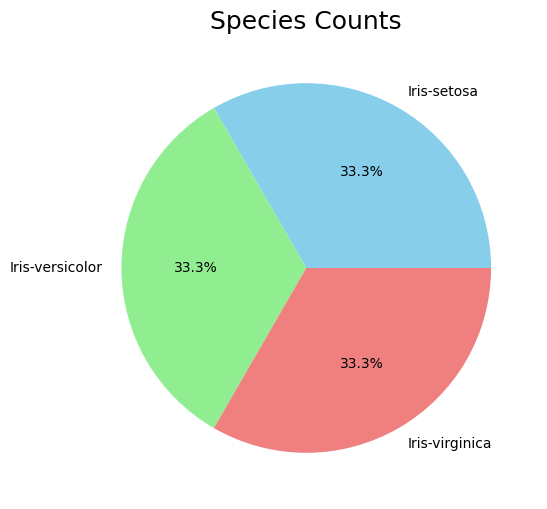

In [33]:
import matplotlib.pyplot as plt

# Count the occurrences of each species
count = df['Species'].value_counts()

# Get unique species labels
labels = count.index.tolist()

# Define different colors for each section of the pie chart
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Species Counts", fontsize=18)
plt.show()



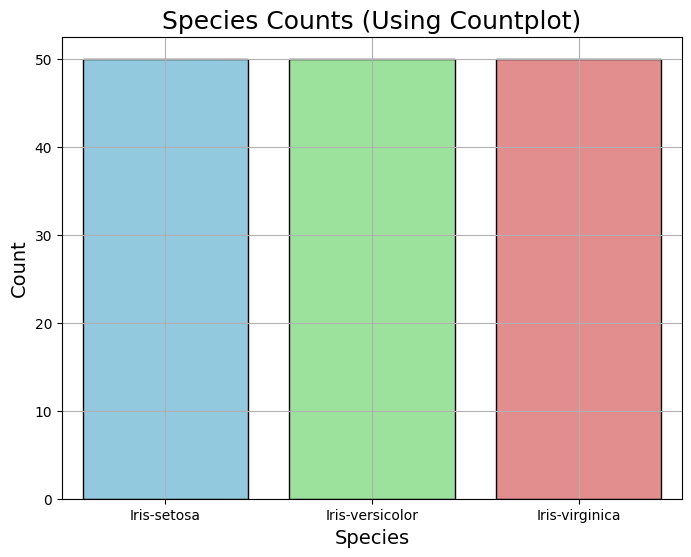

In [35]:
import seaborn as sns

# Define colors to match the previous bar chart
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Countplot using Seaborn with specified colors
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Species', ec='black', palette=colors)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Species Counts (Using Countplot)", fontsize=18)
plt.grid(True)
plt.show()



# Sepal Length Distribution Across Species

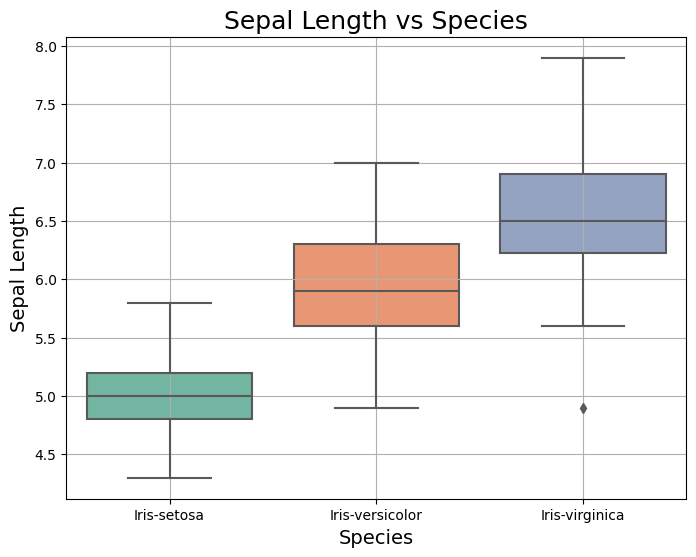

In [36]:
# Box plot for Sepal Length vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df, palette='Set2')
plt.title('Sepal Length vs Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal Length', fontsize=14)
plt.grid(True)
plt.show()


# Sepal Width Distribution Across Species

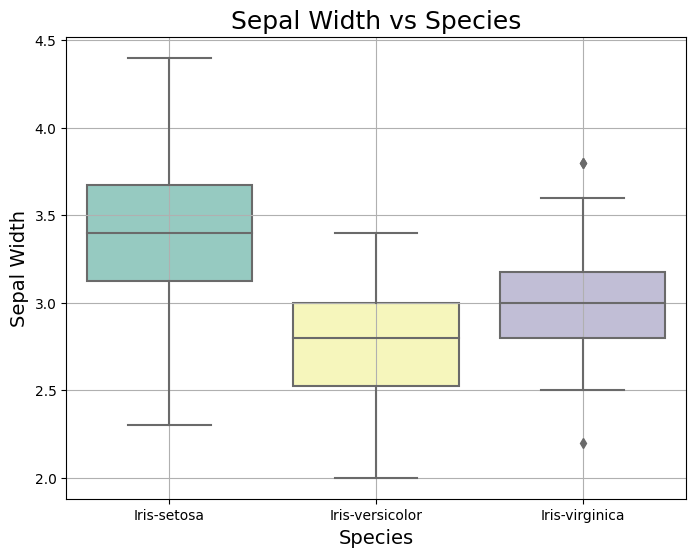

In [37]:
# Box plot for Sepal Width vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=df, palette='Set3')  # Using Set3 palette for different colors
plt.title('Sepal Width vs Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.grid(True)
plt.show()


# Petal Length Distribution Across Species

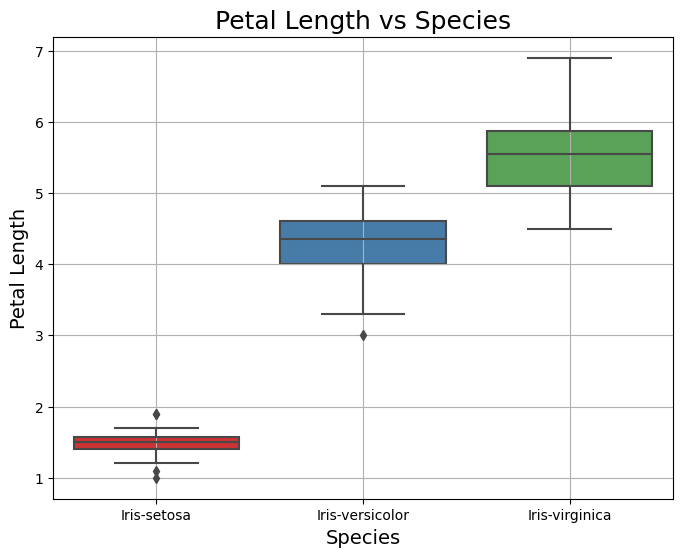

In [38]:
# Box plot for Petal Length vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=df, palette='Set1')  # Using Set1 palette for different colors
plt.title('Petal Length vs Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Petal Length', fontsize=14)
plt.grid(True)
plt.show()


# Petal Width Distribution Across Species

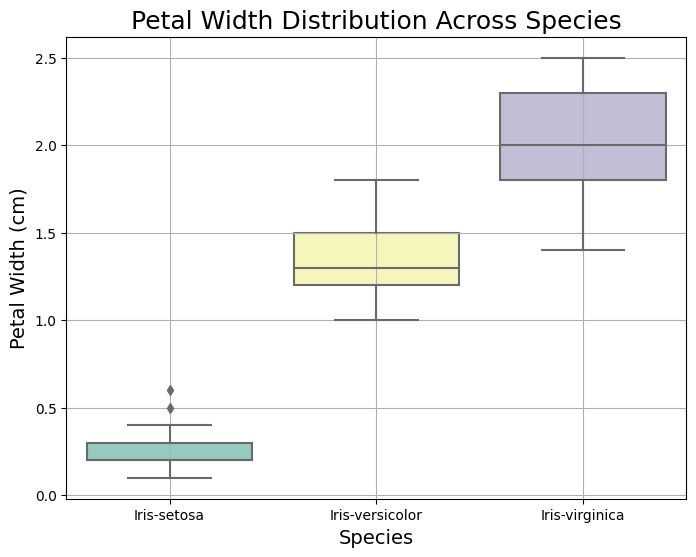

In [39]:
# Box plot for Petal Width vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='PetalWidthCm', data=df, palette='Set3')
plt.title('Petal Width Distribution Across Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.grid(True)
plt.show()


# Visualizing Relationships Across Features

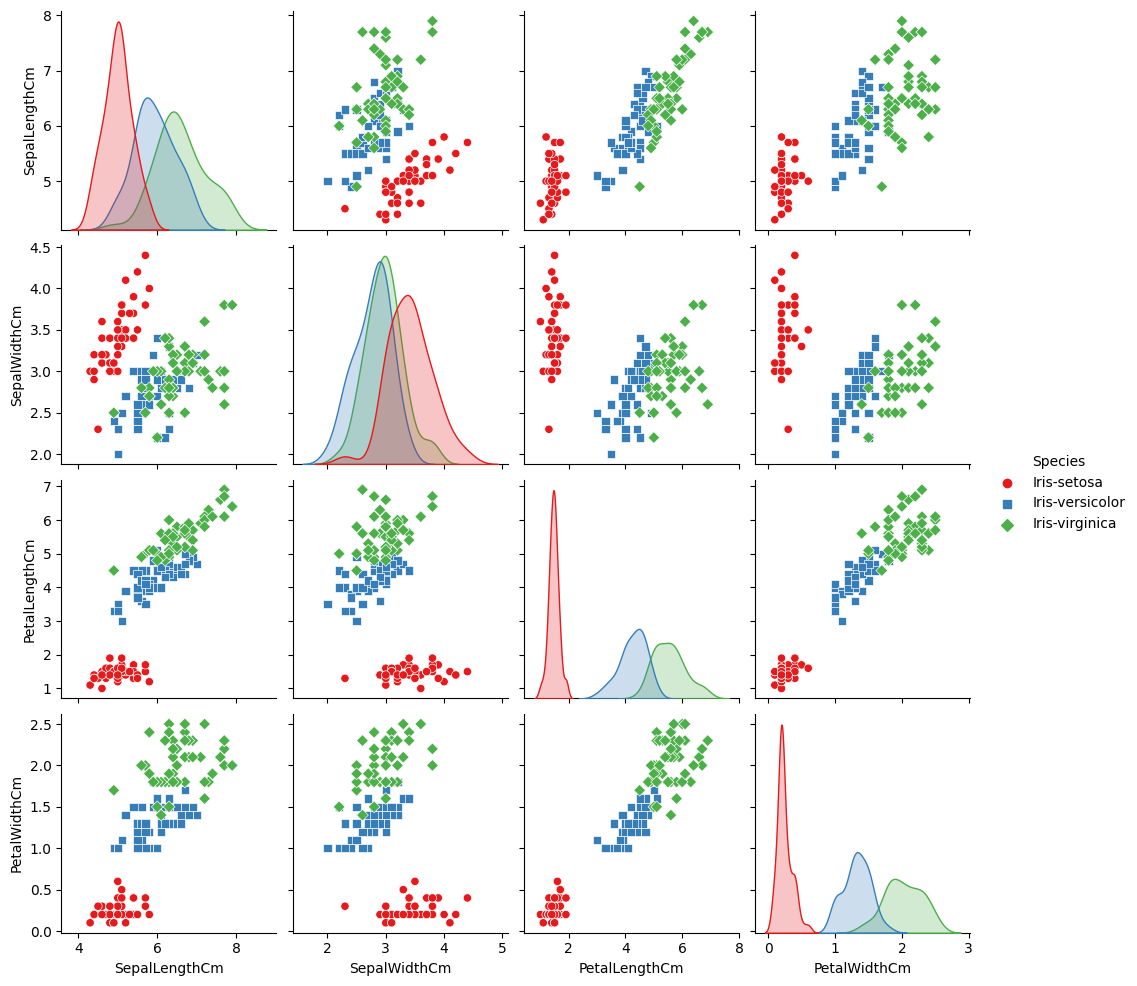

In [41]:
# Whole visualization of the dataset using pairplot
sns.pairplot(df, hue='Species', palette='Set1', markers=["o", "s", "D"])
plt.show()


# Separating Independent Features (x) and Dependent Variable (y)

In [45]:
x = df.iloc[:,:4]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
y = df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

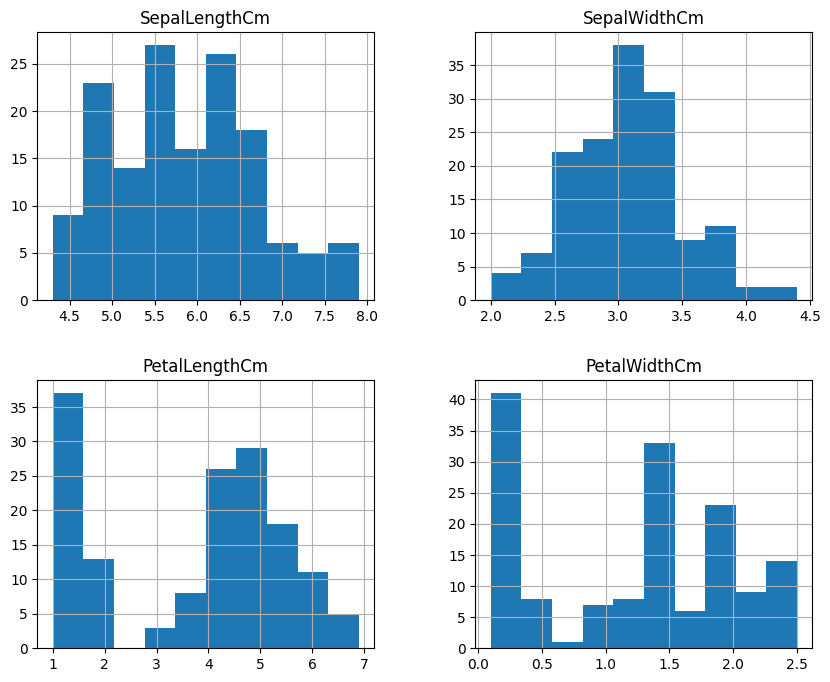

In [47]:
# Separating independent features (x) and the dependent variable (y)
x = df.iloc[:, :4]  # Independent features
y = df.iloc[:, 4]   # Dependent variable

# Plot histograms for each feature in x
x.hist(figsize=(10, 8))
plt.show()

# Splitting the Data into Train and Test Datasets

In [51]:
# Importing train_test_split for splitting the datasets
from sklearn.model_selection import train_test_split

# Splitting the features (x) and target variable (y) into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Viewing the shapes of the training and testing datasets
print("Training Data Shape (Features):", x_train.shape)
print("Testing Data Shape (Features):", x_test.shape)
print("Training Data Shape (Target Variable):", y_train.shape)
print("Testing Data Shape (Target Variable):", y_test.shape)


Training Data Shape (Features): (112, 4)
Testing Data Shape (Features): (38, 4)
Training Data Shape (Target Variable): (112,)
Testing Data Shape (Target Variable): (38,)


In [52]:
# Importing Logistic Regression for making the model
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression model
model = LogisticRegression()

# Training the model using the training datasets
model.fit(x_train, y_train)


LogisticRegression()

# Prediction using the Trained Model

In [53]:
# Making predictions on the test dataset
y_pred = model.predict(x_test)
print("Predicted Species:")
print(y_pred)


Predicted Species:
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


# Classification Report

In [55]:
from sklearn.metrics import classification_report

# Generating and printing the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix

# Generating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


We can conclude that the classification model accurately predicted 37 out of 38 instances, indicating a high level of precision and reliability. Specifically, it achieved perfect predictions for Iris-setosa and Iris-virginica while making only one misclassification for Iris-versicolor. This highlights the model's robustness and effectiveness in distinguishing between the different iris flower species.

# Accuracy Score

In [59]:
from sklearn.metrics import accuracy_score

# Calculating and displaying the accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the model is {:.2f}%".format(accuracy))


Accuracy of the model is 97.37%


The trained machine-learning model exhibits an impressive accuracy of 97.37%. This high level of accuracy signifies the model's proficiency in classifying iris species based on their measurements, reflecting the precision and reliability of the classification system.

# Prediction of New Data

In [64]:
import numpy as np  # Importing NumPy library

# Predicting species for new data points
x_new = np.array([[5.2, 3.5, 1.5, 0.2], [1.9, 2.2, 3.8, 1.1], [3.2, 2.5, 4.6, 1.9]])
predicted_species = model.predict(x_new)
print("Predicted Species for New Data Points:")
print(predicted_species)

# Preventing warning to be printed on output cell
import warnings
warnings.filterwarnings("ignore")



Predicted Species for New Data Points:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**Conclusion:**

- **Utilizing the Iris Flower dataset, I applied the Logistic Regression Algorithm to create a highly accurate classification model.**
- **Through meticulous analysis and model training, the intricate patterns within the dataset were decoded, enabling precise categorization of iris flowers into setosa, versicolor, and virginica species.**
- **The achieved accuracy of 97.37% underscores the model's exceptional performance, highlighting its reliability and effectiveness in botanical classification tasks.**
- **This success emphasizes the seamless integration of machine learning techniques, specifically Logistic Regression, with domain-specific knowledge, showcasing the potential for data-driven advancements in the field of floral classification.**
- **Additionally, the model's proficiency was confirmed by its precise predictions when applied to fresh data, validating its robustness and real-world applicability.**

This task demonstrates the harmonious synergy between data science expertise and the implementation of advanced machine learning algorithms, affirming their pivotal role in unraveling the intricacies of nature's classifications.

**Thank You:**

I would like to express my gratitude to OASIS INFOBYTE team for the opportunity to work on this project. Special thanks to the mentors and the team for their guidance and support throughout. This experience has been invaluable, enhancing my skills and understanding in the realm of data science and machine learning. I look forward to applying this knowledge in future endeavors. Thank you for the enriching learning experience.